<a href="https://colab.research.google.com/github/Madhan-sukumar/Deep-Learning/blob/main/pytorch/Linear_Regression_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating and training a neural network involves the following essential steps:

1. Define the architecture
2. Forward propagate on the architecture using input data
3. Calculate the loss
4. Backpropagate to calculate the gradient for each weight
5. Update the weights using a learning rate

Steps include:

1. Design model (input size, output size, forward pass)
2. construct loss and optimizer
3. Training loop 
      - forward pass: compute prediction and loss
      - bakcward pass:  to initiate back propagation to calculate the gradients
      - update the weights and iterate 

Creating a Simple Linear Regression using Simple NN

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
# prepare the datasets
X_numpy, Y_numpy = datasets.make_regression(n_samples = 100, n_features= 1, noise =20, random_state=1)

In [ ]:
print(type(X_numpy))
print(X_numpy.dtype)

<class 'numpy.ndarray'>
float64


In [ ]:
# the numpy array is in double or float64, so we converting it into tensor and float32
x=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(Y_numpy.astype(np.float32))
print(x.size())
print(y.size())

#reshaping the y to the 1 col with mul rows, since it contains 1 row with mul features
y = y.view(-1,1)
print(x.size())
print(y.size()) 

torch.Size([100, 1])
torch.Size([100])
torch.Size([100, 1])
torch.Size([100, 1])


In [ ]:
#asigning the rows and columns of X as samples and features
n_samples,n_features = x.shape

#DESIGNING THE MODEL

In [ ]:
input_size = n_features #giving one col as input
output_size = 1 #predicting only 1 value

#initialize the single layered linear regression  model
model = nn.Linear(input_size,output_size)

# LOSS AND OPTIMISER

In [ ]:
#set up the loss as MSE since it is a regression
criterion = nn.MSELoss()

#optimiser as stochastic gradient descent
learning_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(),lr=learning_rate)

# TRAINING LOOP

In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
  #forward pass
  y_predicted = model(x)

  #compute the loss
  loss = criterion(y_predicted,y)

  #backward pass
  loss.backward()

  #update the weights
  optimiser.step()

  #empty the gradients to avoid adding already calculated gradients on each loop
  optimiser.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f"epoch: {epoch+1}, loss: {loss.item():.4f}") 



epoch: 10, loss: 4311.1055
epoch: 20, loss: 3218.2812
epoch: 30, loss: 2427.4854
epoch: 40, loss: 1854.6389
epoch: 50, loss: 1439.2651
epoch: 60, loss: 1137.8030
epoch: 70, loss: 918.8303
epoch: 80, loss: 759.6522
epoch: 90, loss: 643.8589
epoch: 100, loss: 559.5704


# PLOTTING

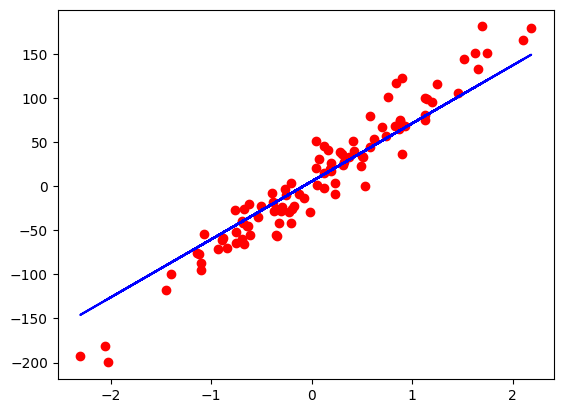

In [ ]:
# before staring predicting, we need to stop the model from tracking the history and forming the backward graph, it set to requires_grad to False and cut it from the computational graph.
#if we dont use no_grad() it will become a part of computational graph and calculate gradients

#predicting for col x
predicted = model(x).detach()

plt.plot(X_numpy, Y_numpy,"ro")
plt.plot(X_numpy,predicted, "b")
plt.show()

In [ ]:
#Printing the Loss
loss = criterion(predicted, y)
print(loss.item())

552.52001953125
